In [59]:
import scipy.special as spec
import scipy.constants as const
from scipy.optimize import root, fsolve, brentq
from mpmath import findroot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def eqs(RT, n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m):
    """
    :param T: Transverse wave number in wire. This is the variable we need to find
    :param eps_wire: The permittivity of the wire :math:`\epsilon_0 \epsilon_r`
    :param wire_rad: The wire radius in meters
    :param V: The fiber parameter of the wire
    :param S0: The first coefficient ofthe Rayleigh identity
    :param m: The order of the mode of interest

    """
    #RT = wire_rad*T
    Rtau =  np.sqrt(V**2 - RT**2)
    # Might need a plus minus here
    beta = np.sqrt(((V**2 - (RT)**2) / wire_rad**2) - omega**2*eps_clad*mu_clad)
    # Bessel function of the first kind
    Jwire = spec.jv(m, RT)
    # First derivative of Bessel function of the first kind
    Jprimewire = spec.jvp(m, RT, n=1)
    # Modified bessel function of the second kind and its
    # first derivative
    Kclad = spec.kv(m, Rtau)
    Kprimeclad = spec.kvp(m, Rtau, n=1)
    # Modified Bessel function of the first kind and its
    # first derivative
    Iclad = spec.iv(m, Rtau)
    Iprimeclad = spec.ivp(m, Rtau, n=1)
    # Break things down into terms
    #t11 = (eps_wire*Jprimewire)/(RT*Jwire)
    bessel_ratio = -1*Jprimewire/Jwire
    #t12 = (eps_clad*(Kprimeclad + S0*Iprimeclad))/(Rtau*(Kclad + S0*Iclad))
    modbessel_ratio = (Kprimeclad + S0*Iprimeclad)/(Kclad + S0*Iclad)
    RT_Rtau_ratio = RT/Rtau
    #T1 = t11 + t12
    #t21 = (mu_wire*Jprimewire)/(RT*Jwire)
    #t22 = (mu_clad*(Kprimeclad+S0*Iprimeclad))/(Rtau*(Kclad + S0*Iclad))
    #T2 = t21 + t22
    #T3 = (m*beta/omega)**2*((1/RT**2) + (1/Rtau)**2)**2
    #res = T1*T2 - T3
    TE_mode = modbessel_ratio*RT_Rtau_ratio
    TM_mode = (n_clad**2/n_wire**2)*modbessel_ratio*RT_Rtau_ratio
    return bessel_ratio, TE_mode, TM_mode

In [2]:
def single_nw_eigvaleq(T, eps_wire, mu_wire, eps_clad, mu_clad, wire_rad, V, S0, omega, m):
    """
    :param T: Transverse wave number in wire. This is the variable we need to find
    :param eps_wire: The permittivity of the wire :math:`\epsilon_0 \epsilon_r`
    :param wire_rad: The wire radius in meters
    :param V: The fiber parameter of the wire
    :param S0: The first coefficient ofthe Rayleigh identity
    :param m: The order of the mode of interest

    """
    RT = wire_rad*T
    Rtau =  np.sqrt(V**2 - RT**2)
    # Might need a plus minus here
    beta = np.sqrt(((V**2 - (RT)**2) / wire_rad**2) - omega**2*eps_clad*mu_clad)
    # Bessel function of the first kind
    Jwire = spec.jv(m, RT)
    # First derivative of Bessel function of the first kind
    Jprimewire = spec.jvp(m, RT, n=1)
    # Modified bessel function of the second kind and its
    # first derivative
    Kclad = spec.kv(m, Rtau)
    Kprimeclad = spec.kvp(m, Rtau, n=1)
    # Modified Bessel function of the first kind and its
    # first derivative
    Iclad = spec.iv(m, Rtau)
    Iprimeclad = spec.ivp(m, Rtau, n=1)
    # Break things down into terms
    #t11 = (eps_wire*Jprimewire)/(RT*Jwire)
    bessel_ratio = -1*Jprimewire/Jwire
    #t12 = (eps_clad*(Kprimeclad + S0*Iprimeclad))/(Rtau*(Kclad + S0*Iclad))
    modbessel_ratio = (Kprimeclad + S0*Iprimeclad)/(Kclad + S0*Iclad)
    RT_Rtau_ratio = RT/Rtau
    #T1 = t11 + t12
    #t21 = (mu_wire*Jprimewire)/(RT*Jwire)
    #t22 = (mu_clad*(Kprimeclad+S0*Iprimeclad))/(Rtau*(Kclad + S0*Iclad))
    #T2 = t21 + t22
    #T3 = (m*beta/omega)**2*((1/RT**2) + (1/Rtau)**2)**2
    #res = T1*T2 - T3
    TE_mode = modbessel_ratio*RT_Rtau_ratio
    TM_mode = (n_clad**2/n_wire**2)*modbessel_ratio*RT_Rtau_ratio
    return bessel_ratio, TE_mode, TM_mode

In [48]:
def nw_array_eigvaleq(T, eps_wire, mu_wire, eps_clad, mu_clad, wire_rad, V, S0, omega, m):
    """
    :param RT: NW radius times transverse wave number in wire. This is the variable we need to find
    :param eps_wire: The permittivity of the wire :math:`\epsilon_0 \epsilon_r`
    :param wire_rad: The wire radius in meters
    :param V: The fiber parameter of the wire
    :param S0: The first coefficient of the Rayleigh identity. Function of geometric params
    :param m: The order of the mode of interest

    """
    RT = wire_rad*T
    Rtau =  np.sqrt(V**2 - RT**2)
    # Bessel function of the first kind
    Jwire = spec.jv(m, RT)
    # First derivative of Bessel function of the first kind
    Jprimewire = spec.jvp(m, RT, n=1)
    # Modified bessel function of the second kind and its
    # first derivative
    Kclad = spec.kv(m, Rtau)
    Kprimeclad = spec.kvp(m, Rtau, n=1)
    # Modified Bessel function of the first kind and its
    # first derivative
    Iclad = spec.iv(m, Rtau)
    Iprimeclad = spec.ivp(m, Rtau, n=1)
    # Break things down into terms
    bessel_ratio = -1*Jprimewire/Jwire
    modbessel_ratio = (Kprimeclad + S0*Iprimeclad)/(Kclad + S0*Iclad)
    RT_Rtau_ratio = RT/Rtau
    TE_mode = modbessel_ratio*RT_Rtau_ratio
    TM_mode = (n_clad**2/n_wire**2)*modbessel_ratio*RT_Rtau_ratio
   
    beta = omega**2*eps_wire*mu_wire - T**2
    b1 = (eps_wire/RT)*bessel_ratio + (eps_clad/Rtau)*modbessel_ratio
    b2 = (mu_wire/RT)*bessel_ratio + (mu_clad/Rtau)*modbessel_ratio
    b3 = (m*beta/omega)**2 
    b4 = ((1/RT**2) + (1/Rtau**2))**2
    return b1*b2 - b3*b4
    #t11 = (eps_wire*Jprimewire)/(RT*Jwire)
    #t12 = (eps_clad*(Kprimeclad + S0*Iprimeclad))/(Rtau*(Kclad + S0*Iclad))
    #T1 = t11 + t12
    #t21 = (mu_wire*Jprimewire)/(RT*Jwire)
    #t22 = (mu_clad*(Kprimeclad+S0*Iprimeclad))/(Rtau*(Kclad + S0*Iclad))
    #T2 = t21 + t22
    #T3 = (m*beta/omega)**2*((1/RT**2) + (1/Rtau)**2)**2
    #res = T1*T2 - T3
    #return bessel_ratio, TE_mode, TM_mode

<IPython.core.display.Javascript object>


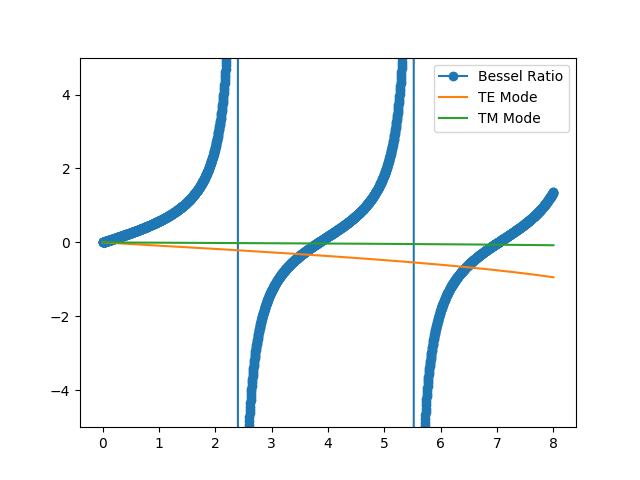

In [63]:
# radius of NW, microns
wire_rad = .06
# freq of incident light, rads/s
omega = 2*np.pi*1.14380945441E+15
# Wire params
#n_wire = complex(3.799, 3.575)
n_wire = 3.5
epsr_wire = complex(n_wire.real**2 - n_wire.imag**2, 2*n_wire.real*n_wire.imag) 
eps_wire = const.epsilon_0*epsr_wire
mur_wire = 1
mu_wire = const.mu_0*mur_wire
k_wire = omega*n_wire/const.c
# Cladding params (i.e air)
mur_clad = 1
mu_clad = const.mu_0*mur_clad
epsr_clad = complex(1, 0)
eps_clad = const.epsilon_0*epsr_clad
n_clad = 1
k_clad = omega*n_clad/const.c
# Fiber parameter, V parameter, fiber number, normalized frequency
V = (omega*wire_rad/const.c)*np.sqrt(n_wire**2 - n_clad**2)
V = 12
S0 = 0
m = 0
RT = np.linspace(0, 8, 2000)
bessel_ratio, TE, TM = eqs(RT, n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m)
plt.figure()
plt.plot(RT, bessel_ratio, '-o', label="Bessel Ratio")
plt.plot(RT, TE, label="TE Mode")
plt.plot(RT, TM, label="TM Mode")
plt.ylim([-5, 5])
plt.legend()
plt.show()

In [14]:
def get_eigvals(n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m):
    """
    A function to compute the eigenvalues of the mth order modes
    of an infinite array of cylindrical wave guides
    """
    def func(T, n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m):
        bessel_ratio, TE, TM = eqs(T, n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m)
        return bessel_ratio - TE
    res = root(func, np.array([3.5]), args=(n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m))
    print(res)
    return res

In [50]:
result = get_eigvals(n_wire, mu_wire, n_clad, mu_clad, wire_rad, V, S0, omega, m)


    fjac: array([[-1.]])
     fun: array([ -5.77315973e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([  2.06381895e-09])
       r: array([-1.29402439])
  status: 1
 success: True
       x: array([ 3.53308901])


In [60]:
#print(eps_wire)
#res = brentq(nw_array_eigvaleq, 3.4, 3.6, args=(epsr_wire.real, mur_wire, epsr_clad.real, mur_clad, wire_rad, V, S0, omega, m))
#print(res)
res = findroot(nw_array_eigvaleq, 3.5, args=(eps_wire.real, mu_wire, eps_clad.real, mu_clad, wire_rad, V, S0, omega, m))
print(res)

TypeError: nw_array_eigvaleq() missing 9 required positional arguments: 'eps_wire', 'mu_wire', 'eps_clad', 'mu_clad', 'wire_rad', 'V', 'S0', 'omega', and 'm'